In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [6]:
df = pd.read_csv('data/data2.csv')

In [7]:
def changeBool(new_df):
    bool_columns = new_df.select_dtypes(include='bool').columns

    # Now apply a function that converts True to 1 and False to 0 only to these columns
    new_df[bool_columns] = new_df[bool_columns].applymap(lambda x: 1 if x else 0)
    return new_df

X_train = changeBool(pd.read_csv("./data/X_train.csv")).drop(["id"], axis=1)
X_test = changeBool(pd.read_csv("./data/X_test.csv")).drop(["id"], axis=1)
y_train =  changeBool(pd.read_csv("./data/y_train.csv"))
y_test = changeBool(pd.read_csv("./data/y_test.csv"))

X_train

/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/16089958.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[bool_columns] = new_df[bool_columns].applymap(lambda x: 1 if x else 0)
/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/16089958.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[bool_columns] = new_df[bool_columns].applymap(lambda x: 1 if x else 0)
/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/16089958.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[bool_columns] = new_df[bool_columns].applymap(lambda x: 1 if x else 0)
/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/16089958.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  new_df[bool_columns] = new_df[bool_columns].applymap(lambda x: 1 if x else 0)


,amount,gender,cityPop,unixTime,merchLatitude,merchLongitude,age,state_CO,state_IL,state_KY,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
0,0.001003,0,4.431817e-06,0.463679,0.418307,0.926180,0.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,0.683789
1,0.000817,0,7.283487e-07,0.841830,0.470853,0.826752,0.5875,0,0,0,...,0,0,0,0,0,0,0,0,0,0.668756
2,0.005989,0,7.727903e-06,0.562005,0.563264,0.435563,0.8500,0,0,0,...,0,0,0,1,0,0,0,0,0,0.725049
3,0.000491,0,9.988870e-05,0.905645,0.446870,0.858879,0.3375,0,0,0,...,0,0,0,0,0,0,0,0,0,0.346783
4,0.000035,0,8.394527e-07,0.776830,0.637066,0.735188,0.0625,0,0,0,...,0,0,0,0,0,0,0,0,0,0.574452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0.000224,1,1.871486e-05,0.895663,0.487045,0.741246,0.5000,0,0,0,...,0,0,0,0,0,0,0,0,0,0.660464
1332,0.002011,0,4.091715e-05,0.794441,0.333708,0.895760,0.5250,0,0,0,...,0,0,0,0,0,0,0,0,0,0.792255
1333,0.005864,1,1.464610e-03,0.808835,0.198250,0.846514,0.6875,0,0,0,...,0,0,0,1,0,0,0,0,0,0.304593
1334,0.000778,1,7.783455e-06,0.758327,0.215429,0.742332,0.4000,0,0,0,...,0,0,0,0,0,0,1,0,0,0.723542


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud', 'id'], axis=1), df['isFraud'], 
                                                    test_size=0.2, random_state=42)

# for better result change the test_size to 0.0001

In [145]:
# Train the logistic regression model

# Ideal model and parameters for optimized accuracy
rtc = RandomForestClassifier(
    max_features=0.4,
    max_depth=None,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

# lr = LogisticRegression(random_state=42)
# lr = LinearRegression()
# lr = DecisionTreeClassifier(random_state=42)
# lr = KNeighborsClassifier()
# lr = GradientBoostingClassifier(random_state=42)
# lr = RidgeClassifier()
# lr.fit(X_train, y_train)
rtc.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [149]:
# Evaluate the performance of the model
# y_pred = lr.predict(X_test)

# Change the threshold of accepted data
y_pred = rtc.predict_proba(X_test)[:,1] >= 0.479
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


TypeError: list indices must be integers or slices, not tuple

In [117]:
importance = rtc.feature_importances_

# Sort feature importance in descending order
sorted_importance = sorted(zip(importance, X_train.columns), reverse=True)

# Print feature importance in descending order
for i, f in enumerate(sorted_importance):
    print("{:2d}) {:<30} {:.2%}".format(i + 1, f[1], f[0]))

 1) amount                         43.06%
 2) Unnamed: 0                     13.68%
 3) cityPop                        13.28%
 4) state_CO                       6.82%
 5) merchLongitude                 4.63%
 6) merchLatitude                  4.60%
 7) unixTime                       4.08%
 8) gender                         3.91%
 9) state_KY                       3.30%
10) age                            1.82%
11) state_IL                       0.82%


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud', 'Unnamed: 0'], axis=1), df['isFraud'], 
                                                    test_size=0.2, random_state=42)

rtc = RandomForestClassifier(
    max_features=0.4,
    max_depth=None,
    min_samples_leaf=1,
    criterion='entropy',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

rtc.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [148]:
import numpy as np
probabilities = np.array(rtc.predict_proba(X_test))
y_pred = probabilities[:, 1] >= 0.479
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 1336) + inhomogeneous part.

In [11]:
importance = rtc.feature_importances_

# Sort feature importance in descending order
sorted_importance = sorted(zip(importance, X_train.columns), reverse=True)

# Print feature importance in descending order
for i, f in enumerate(sorted_importance):
    print("{:2d}) {:<30} {:.2%}".format(i + 1, f[1], f[0]))

 1) amount                         46.10%
 2) unixTime                       20.35%
 3) category_grocery_pos           7.46%
 4) merchLongitude                 5.09%
 5) age                            5.03%
 6) merchLatitude                  4.79%
 7) cityPop                        4.26%
 8) distance_between               4.06%
 9) category_gas_transport         1.91%
10) category_shopping_net          0.95%


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud', 'Unnamed: 0'], axis=1), df['isFraud'], 
                                                    test_size=0.2, random_state=42)

rtc = RandomForestClassifier(
    max_features=0.4,
    max_depth=None,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

rtc.fit(X_train, y_train)

RandomForestClassifier(max_features=0.4, n_estimators=1000, n_jobs=-1,
                       random_state=42)

In [13]:
y_pred = rtc.predict_proba(X_test)[:,1] >= 0.479
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9979650763096384
Precision: 0.9282511210762332
Recall: 0.7811320754716982
F1 Score: 0.8483606557377049
Confusion Matrix:
 [[36084    16]
 [   58   207]]


In [14]:
importance = rtc.feature_importances_

# Sort feature importance in descending order
sorted_importance = sorted(zip(importance, X_train.columns), reverse=True)

# Print feature importance in descending order
for i, f in enumerate(sorted_importance):
    print("{:2d}) {:<30} {:.2%}".format(i + 1, f[1], f[0]))

 1) amount                         46.26%
 2) unixTime                       20.16%
 3) category_grocery_pos           7.29%
 4) merchLongitude                 5.22%
 5) age                            5.01%
 6) merchLatitude                  4.78%
 7) cityPop                        4.43%
 8) distance_between               3.98%
 9) category_gas_transport         2.01%
10) category_shopping_net          0.87%


In [15]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'max_features': [0.3, 0.5, 'sqrt'],
    'min_samples_leaf': [1, 3, 5],
    'max_depth': [None, 10, 20, 30],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rtc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit it to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=32.1min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=32.2min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=32.2min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=32.3min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=32.3min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=32.3min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=32.4min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=32.4min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=5; total time=12.6min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=12.8min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=5; total time=12.8min
[CV] END max_depth=None, max_feature

KeyboardInterrupt: 

In [17]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search over
param_grid = {
    'max_features': [0.3, 0.5],
    'min_samples_leaf': [1, 3],
    'max_depth': [None, 20],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rtc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit it to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=12.8min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=12.8min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=12.9min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=12.9min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=3; total time=13.0min
[CV] END max_depth=None, max_features=0.3, min_samples_leaf=1; total time=13.1min
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1; total time=24.3min
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1; total time=24.9min
[CV] END .max_depth=20, max_features=0.3, min_samples_leaf=1; total time=15.2min
[CV] END .max_depth=20, max_features=0.3, min_samples_leaf=1; total time=15.6min
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=1; total time=20.3min
[CV] END max_depth=None, max_features=0.

HERE

In [12]:
rtc = RandomForestClassifier(
    max_features=0.3,
    max_depth=20,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

rtc.fit(X_train, y_train["isFraud"])

RandomForestClassifier(max_depth=20, max_features=0.3, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [15]:
y_pred = rtc.predict_proba(X_test)[:,1] >= 0.5
print('Accuracy:', accuracy_score(y_test["isFraud"], y_pred))
print('Precision:', precision_score(y_test["isFraud"], y_pred))
print('Recall:', recall_score(y_test["isFraud"], y_pred))
print('F1 Score:', f1_score(y_test["isFraud"], y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test["isFraud"], y_pred))

Accuracy: 0.9655688622754491
Precision: 0.9768875192604006
Recall: 0.9533834586466166
F1 Score: 0.964992389649924
Confusion Matrix:
 [[656  15]
 [ 31 634]]


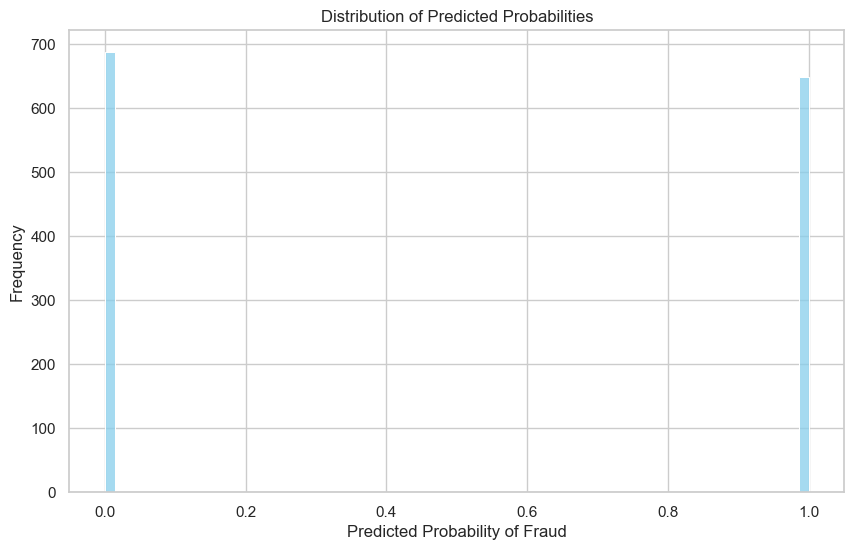

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set(style='whitegrid')

# Plotting histogram of the probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, bins=70, kde=False, color='skyblue')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Frequency')

plt.show()


/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/667857854.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(fraud_probs, shade=True, color="r", label="Fraud")
/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_37839/667857854.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(non_fraud_probs, shade=True, color="b", label="Non-Fraud")


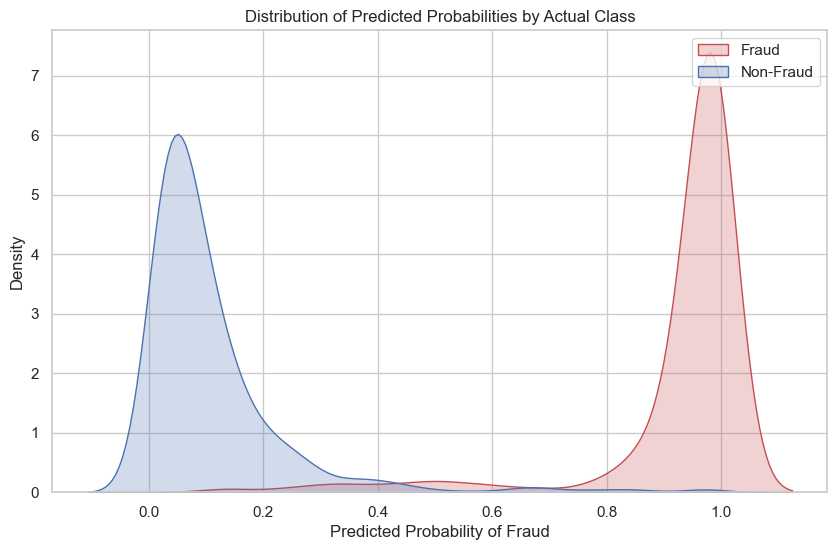

In [19]:
# Assuming rtc is your trained model and X_test is your test set
# probabilities = rtc.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
probabilities = rtc.predict_proba(X_test)[:, 1] 

# You need the actual labels (y_test) and the predicted probabilities
fraud_probs = probabilities[y_test["isFraud"] == 1]
non_fraud_probs = probabilities[y_test["isFraud"] == 0]

plt.figure(figsize=(10, 6))
sns.kdeplot(fraud_probs, shade=True, color="r", label="Fraud")
sns.kdeplot(non_fraud_probs, shade=True, color="b", label="Non-Fraud")
plt.title('Distribution of Predicted Probabilities by Actual Class')
plt.xlabel('Predicted Probability of Fraud')
plt.ylabel('Density')
plt.legend()

plt.show()


In [20]:
dataSet =  pd.read_csv("./data/data2.csv")

dataSet

,id,amount,gender,cityPop,unixTime,merchLatitude,merchLongitude,age,state_CO,state_IL,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between,isFraud
0,0,0.000032,0,4.143563e-05,0.000000,0.440700,0.772111,0.7375,False,True,...,False,False,True,False,False,False,False,False,0.572049,0
1,1,0.000021,1,4.925612e-06,0.000000,0.390349,0.842510,0.9750,False,False,...,False,False,False,False,False,True,False,False,0.298690,0
2,2,0.000178,0,2.080114e-06,0.000002,0.420541,0.448314,0.6250,False,False,...,False,False,False,True,False,False,False,False,0.823143,0
3,3,0.000074,1,1.871486e-05,0.000002,0.509176,0.725492,0.5000,False,False,...,False,False,False,True,False,False,False,False,0.507048,0
4,4,0.001002,0,1.188196e-05,0.000008,0.423723,0.885317,0.4875,False,False,...,False,False,False,False,False,False,False,False,0.358400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181817,181817,0.000566,1,2.660448e-04,0.999998,0.412495,0.892959,0.6750,False,False,...,False,True,False,False,False,False,False,False,0.227643,0
181818,181818,0.000058,1,7.662253e-03,0.999998,0.305187,0.496819,0.5625,False,False,...,False,False,False,False,False,False,False,True,0.419812,0
181819,181819,0.000359,0,6.172446e-07,1.000000,0.449861,0.599924,0.3750,False,False,...,False,False,False,False,True,False,False,False,0.627880,0
181820,181820,0.000092,1,5.865985e-04,1.000000,0.277880,0.694989,0.2125,False,False,...,True,False,False,False,False,False,False,False,0.500155,0


In [33]:
y_pred2 = rtc.predict_proba(dataSet.drop(["id", "isFraud"], axis=1))[:,1] >= 0.67
# Generate the confusion matrix
cm = confusion_matrix(dataSet["isFraud"], y_pred2)

# Calculate precision, recall, and accuracy
precision = precision_score(dataSet["isFraud"], y_pred2, average='binary')  # Adjust 'binary' if you have multi-class classification
recall = recall_score(dataSet["isFraud"], y_pred2, average='binary')  # Adjust 'binary' if you have multi-class classification
accuracy = accuracy_score(dataSet["isFraud"], y_pred2)
f1 = f1_score(dataSet["isFraud"], y_pred2, average='binary')  # Adjust 'binary' if you have multi-class classification


# Print the confusion matrix and the calculated metrics
def runCM(cm, precision, recall, accuracy, f1):
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

runCM(cm, precision, recall, accuracy, f1)

Confusion Matrix:
[[177872   2614]
 [    51   1285]]
Precision: 0.32957168504744805
Recall: 0.9618263473053892
Accuracy: 0.9853428078010362
F1 Score: 0.4909264565425023


In [47]:
probabilities = rtc.predict_proba(X_test)[:, 1]  # Probabilities of the positive class
threshold = 0.2  # Example threshold
predictions = (probabilities >= threshold).astype(int)  # Apply threshold

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
probabilities = rtc.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- category_entertainment
- category_food_dining
- category_grocery_net
- category_health_fitness
- category_home
- ...


In [20]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud', 'Unnamed: 0'], axis=1), df['isFraud'], 
                                                    test_size=0.2, random_state=42)

rtc = RandomForestClassifier(
    max_features=0.3,
    max_depth=20,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

rtc.fit(X_train, y_train)

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'threshold'

In [70]:
df = pd.read_csv('data/data2.csv')

X_train, X_test, y_train, y_test = train_test_split(df.drop(['isFraud', 'Unnamed: 0'], axis=1), df['isFraud'], 
                                                    test_size=0.2, random_state=42)

rtc = RandomForestClassifier(
    max_features=0.3,
    max_depth=20,
    min_samples_leaf=1,
    criterion='gini',
    random_state=42,
    n_estimators=1000,
    n_jobs=-1,
    )

rtc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.3, n_estimators=1000,
                       n_jobs=-1, random_state=42)

In [104]:
y_pred = rtc.predict_proba(X_test)[:,1] >= 0.3
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.9978275814656951
Precision: 0.8661417322834646
Recall: 0.8301886792452831
F1 Score: 0.8477842003853564
Confusion Matrix:
 [[36066    34]
 [   45   220]]


In [107]:
probabilities = rtc.predict_proba(X_test)[:, 1] >= 0.3
print(confusion_matrix(y_test, probabilities))
print(classification_report(y_test, probabilities))

[[36066    34]
 [   45   220]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     36100
           1       0.87      0.83      0.85       265

    accuracy                           1.00     36365
   macro avg       0.93      0.91      0.92     36365
weighted avg       1.00      1.00      1.00     36365



In [93]:
a = rtc.predict_proba(X_test)[:, 1] >= 0.3
confusion_matrix(y_test, probabilities)

array([[36066,    34],
       [   45,   220]])

In [94]:
X_test.shape

(36365, 39)

In [101]:
X_train

,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,age,state_CO,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between
1560,0.000532,0,29.8826,-84.5964,0.000001,0.543870,0.208014,0.820897,0.1875,False,...,True,False,False,False,False,False,False,False,False,0.720744
21117,0.001107,1,38.4921,-85.4524,0.000003,0.564241,0.410978,0.822460,0.1000,False,...,False,False,False,False,False,False,False,False,False,0.461528
67360,0.000254,0,37.9943,-88.9417,0.000002,0.774676,0.379014,0.770614,0.3500,False,...,False,False,False,False,False,False,False,False,False,0.865797
169394,0.000713,1,42.4069,-74.1528,0.000002,0.901794,0.500044,0.933717,0.4125,False,...,False,False,False,False,False,False,False,False,False,0.452276
151367,0.000323,1,34.7789,-86.5438,0.001174,0.879704,0.339340,0.809261,0.4000,False,...,False,True,False,False,False,False,False,False,False,0.458306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.000476,1,35.0583,-79.0080,0.001473,0.839811,0.321322,0.881067,0.1375,False,...,False,False,False,False,False,True,False,False,False,0.550300
103694,0.000025,1,41.2244,-86.6966,0.000036,0.819513,0.463501,0.807642,0.5625,False,...,False,False,False,False,False,False,False,False,True,0.317983
131932,0.000476,0,41.6060,-109.2300,0.000173,0.856297,0.488687,0.570508,0.2500,False,...,False,False,False,False,False,False,False,False,False,0.607490
146867,0.000466,1,35.9866,-106.0654,0.000114,0.875036,0.349962,0.613335,0.4000,False,...,False,False,False,False,False,False,False,False,False,0.393017


In [103]:
s = pd.read_csv("./data/data2.csv")
s

,Unnamed: 0,amount,gender,latitude,longitude,cityPop,unixTime,merchLatitude,merchLongitude,age,...,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,distance_between,isFraud
0,0,0.000032,0,40.7152,-89.2706,4.143563e-05,0.000000,0.440700,0.772111,0.7375,...,False,False,True,False,False,False,False,False,0.572049,0
1,1,0.000021,1,37.2692,-82.9161,4.925612e-06,0.000000,0.390349,0.842510,0.9750,...,False,False,False,False,False,True,False,False,0.298690,0
2,2,0.000178,0,38.2427,-122.9145,2.080114e-06,0.000002,0.420541,0.448314,0.6250,...,False,False,False,True,False,False,False,False,0.823143,0
3,3,0.000074,1,42.8511,-93.6200,1.871486e-05,0.000002,0.509176,0.725492,0.5000,...,False,False,False,True,False,False,False,False,0.507048,0
4,4,0.001002,0,39.3716,-77.8229,1.188196e-05,0.000008,0.423723,0.885317,0.4875,...,False,False,False,False,False,False,False,False,0.358400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181817,181817,0.000566,1,38.7894,-77.2818,2.660448e-04,0.999998,0.412495,0.892959,0.6750,...,False,True,False,False,False,False,False,False,0.227643,0
181818,181818,0.000058,1,33.0067,-117.0690,7.662253e-03,0.999998,0.305187,0.496819,0.5625,...,False,False,False,False,False,False,False,True,0.419812,0
181819,181819,0.000359,0,41.0539,-106.0763,6.172446e-07,1.000000,0.449861,0.599924,0.3750,...,False,False,False,False,True,False,False,False,0.627880,0
181820,181820,0.000092,1,32.9276,-97.2489,5.865985e-04,1.000000,0.277880,0.694989,0.2125,...,True,False,False,False,False,False,False,False,0.500155,0
